## Getting Moving Average Convergence Divergence For Markets

#### Importing Dependencies

In [3]:
import tradingeconomics as te
from stockstats import StockDataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objs as pgo

#### API login


In [6]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

### Function

In [9]:
def moving_average_convergence_divergence(symbol, plot_type,total_days_interval):
#     symbol="BTCUSD:CUR"
#     total_days_interval = 360
    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")
    stock_df = StockDataFrame.retype(df)
    stock_df

   
    
    
    def get_static_plot(df):
    
        plt.style.use('bmh')
        fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
        ax.plot(stock_df['macd'], label='MACD')  # Plot some data on the axes.
        ax.plot(stock_df['macds'], label='MACD signal line')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title("Moving Average Convergence Divergence (MACD)")  # Add a title to the axes.
        ax.legend()  # Add a legend.
        
    def get_dynamic_plot(df):
         #Dynamic Plot

        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['macd'], line=dict(color='red', width= 1), name ='MACD'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['macds'], line=dict(color='blue', width= 1), name ='MACD signal line'))
        # fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

    #     fig.add_trace(pgo.Candlestick(x = stock_df.index, open = stock_df['open'], high = stock_df['high'], low = stock_df['low'], close = stock_df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='Moving Average Convergence Divergence (MACD) ' + symbol.upper(), yaxis_title='')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()

        
        
    
    if plot_type == 'static':
        get_static_plot(stock_df)
        
    if plot_type == 'dynamic':
        get_dynamic_plot(stock_df)




## GitHub non-dynamic preview

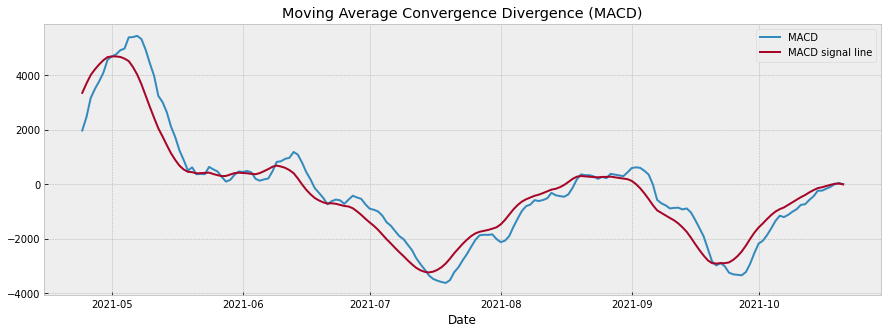

In [10]:
moving_average_convergence_divergence(symbol="BTCUSD:CUR",plot_type='static', total_days_interval=180)

## Dynamic Plot uses Python's Kernel to render 
### (You can go to http://jupyter.tradingeconomics.com/ to use the dynamic plot)

In [13]:
moving_average_convergence_divergence(symbol="BTCUSD:CUR",plot_type='dynamic', total_days_interval=360)